In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the data
df = pd.read_csv('./data/v6_time_cnty_pts_wgs84.csv')

In [3]:
# Set the year range
min_beg_yr = -800
max_end_yr = 1900

# Set the interval
n = 100
time_range = range(min_beg_yr, max_end_yr + 1, n)

# Divide the data into n-year intervals using the cut function of pandas
df['YEAR_RANGE'] = pd.cut(df['BEG_YR'], bins=time_range)

# Use the value_counts function to calculate the number of data points in each interval
counts = df['YEAR_RANGE'].value_counts().sort_index()

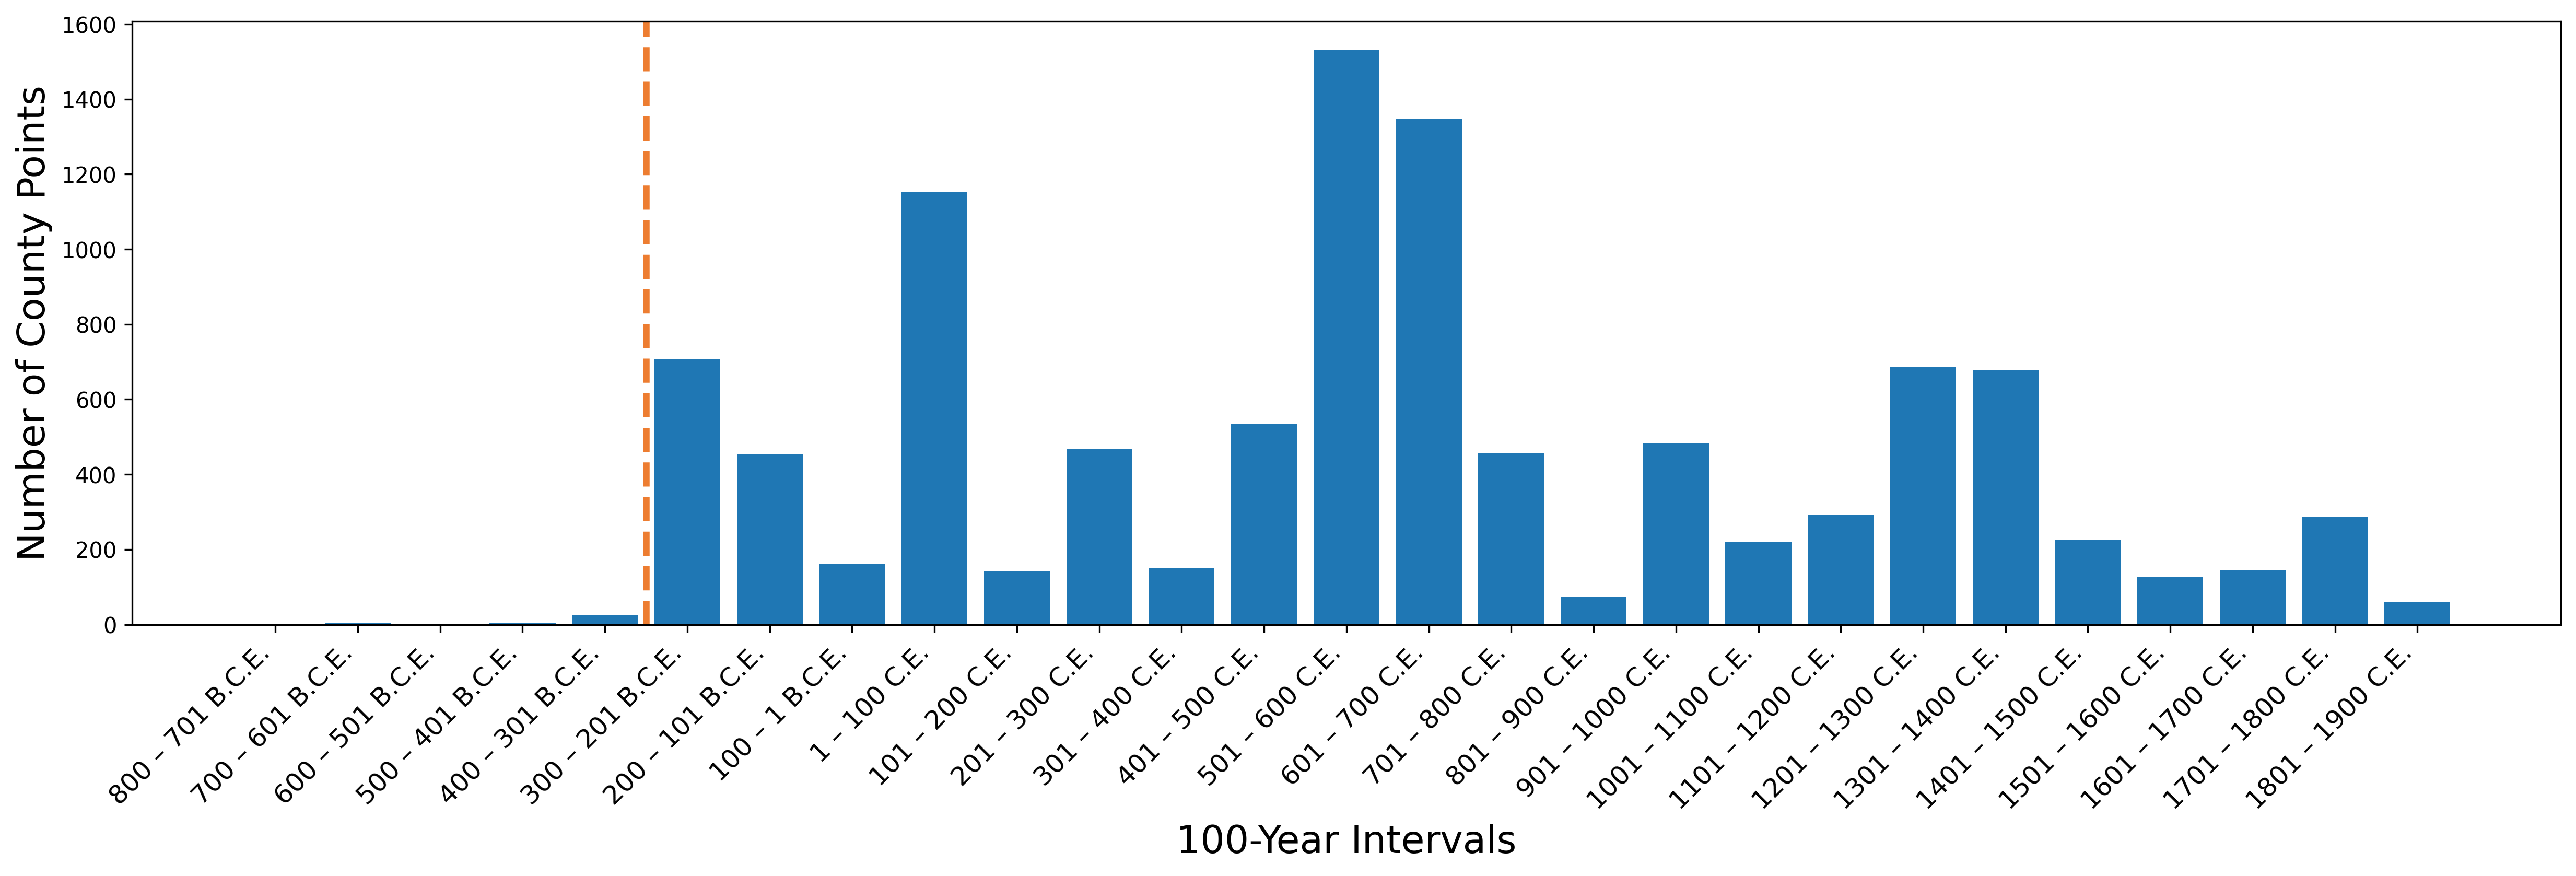

In [6]:
# Convert the interval to CE/BCE form
counts.index = counts.index.astype(str)
counts_indexes = list(counts.index)
new_counts_indexes = []
for i in range(len(counts_indexes)):
    counts_index = counts_indexes[i]
    if '-' in counts.index[i]:
        counts_index = counts_index.replace(']', ' B.C.E.')
        counts_index = counts_index.replace('-', '')
        counts_index = counts_index.replace('0 B.C.E.', '1 B.C.E.')
    else:
        counts_index = counts_index.replace(']', ' C.E.')
        counts_index = counts_index.replace('0,', '1,')
    counts_index = counts_index.replace(',', ' –')
    counts_index = counts_index.replace('(', '')
    new_counts_indexes.append(counts_index)

# Plot the histogram
plt.figure(figsize=(20, 5), dpi=300)
plt.bar(new_counts_indexes, counts.values, width=0.8)
plt.xlabel(str(n) + '-Year Intervals', fontsize=17.5)
plt.ylabel('Number of County Points', fontsize=17.5)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Plot a vertical line at 0
plt.axvline(x=4.5, color='#ED7D31', linestyle='--', linewidth=3)

# Show the plot
plt.show()